In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nst41_phyio_exp = pd.read_csv("../Physiological Preprocessed/Exp2/NST41_driving.csv")
nst41_phyio_exp.Time = pd.to_timedelta(nst41_phyio_exp.Time)
nst41_phyio_exp["Time"] = nst41_phyio_exp["Time"]
nst41_phyio_exp.set_index('Time', inplace=True)

In [3]:
# nst41_takeover_times = pd.read_csv(exp2_folder_path + "/driver_takeover_times.csv")
nst41_takeover_times = pd.read_csv(
    "../AdVitam/Exp2/Preprocessed/Physio and Driving/timestamps_obstacles.csv"
)

# Convert the takeover times to timedelta
nst41_takeover_times.iloc[:, 2:] = nst41_takeover_times.iloc[:, 2:].apply(pd.to_timedelta, unit="s")

# Drop the label_st column
nst41_takeover_times.drop(columns=["label_st"], inplace=True)

# Ensure that the subject_id column is a string with 2 digits
nst41_takeover_times["subject_id"] = nst41_takeover_times["subject_id"].apply(
    lambda x: str(x.split("T")[0] + "T" + x.split("T")[1].zfill(2))
)

# Rename the first column to subject_id
nst41_takeover_times = nst41_takeover_times.rename(columns={"Unnamed: 0": "subject_id"})

# Rename the columns to match the other datasets
for column in nst41_takeover_times.columns:
    if "Obs1" in column:
        nst41_takeover_times = nst41_takeover_times.rename(
            columns={column: column.replace("Obs1", "Deer")}
        )
    elif "Obs2" in column:
        nst41_takeover_times = nst41_takeover_times.rename(
            columns={column: column.replace("Obs2", "Cone")}
        )
    elif "Obs3" in column:
        nst41_takeover_times = nst41_takeover_times.rename(
            columns={column: column.replace("Obs3", "Frog")}
        )
    elif "Obs4" in column:
        nst41_takeover_times = nst41_takeover_times.rename(
            columns={column: column.replace("Obs4", "Can")}
        )
    # elif "Obs5" in column:
    # nst41_takeover_times = nst41_takeover_times.rename(columns={column: column.replace("Obs5", "FA1")})
    # elif "Obs6" in column:
    # nst41_takeover_times = nst41_takeover_times.rename(columns={column: column.replace("Obs6", "FA2")})

# Rename the columns to match the other datasets
for column in nst41_takeover_times.columns:
    if "TrigObs" in column:
        nst41_takeover_times = nst41_takeover_times.rename(
            columns={column: column.replace("TrigObs", "") + "TOR"}
        )
    elif "RepObs" in column:
        nst41_takeover_times = nst41_takeover_times.rename(
            columns={column: column.replace("RepObs", "Response")}
        )

obstalcles = ["Deer", "Cone", "Frog", "Can"]
for obstacle in obstalcles:
    nst41_takeover_times["TOT" + obstacle] = (
        nst41_takeover_times["Response" + obstacle] - nst41_takeover_times[obstacle + "TOR"]
    )

nst41_takeover_times = nst41_takeover_times[nst41_takeover_times["subject_id"] == "NST41"].copy()

In [4]:
nst41_takeover_times

,subject_id,DeerTOR,DetObsDeer,ResponseDeer,ConeTOR,DetObsCone,ResponseCone,FrogTOR,DetObsFrog,ResponseFrog,...,FA1TOR,DetObsFA1,ResponseFA1,FA2TOR,DetObsFA2,ResponseFA2,TOTDeer,TOTCone,TOTFrog,TOTCan
40,NST41,0 days 00:07:42.387100,0 days 00:07:44.640900,0 days 00:07:46.421200,0 days 00:13:34.372000,0 days 00:13:36.073900,0 days 00:13:36.940900,0 days 00:17:47.599300,0 days 00:17:50.305300,0 days 00:17:51.192300,...,0 days 00:01:58.910300,0 days 00:01:59.599300,NaT,0 days 00:10:46.297300,0 days 00:10:49.311200,NaT,0 days 00:00:04.034100,0 days 00:00:02.568900,0 days 00:00:03.593000,0 days 00:00:02.622000


In [5]:
obstacle = "Deer"

In [6]:

takeover_request_time = nst41_takeover_times[f"{obstacle}TOR"]
takeover_request_time

40   0 days 00:07:42.387100
Name: DeerTOR, dtype: timedelta64[ns]

In [7]:

driver_response_time = nst41_takeover_times[f"Response{obstacle}"]
driver_response_time

40   0 days 00:07:46.421200
Name: ResponseDeer, dtype: timedelta64[ns]

In [8]:
observations_around_obstacle = nst41_phyio_exp.loc[
    takeover_request_time.values[0]
    - pd.Timedelta(seconds=10) : takeover_request_time.values[0]
    + pd.Timedelta(seconds=15)
]

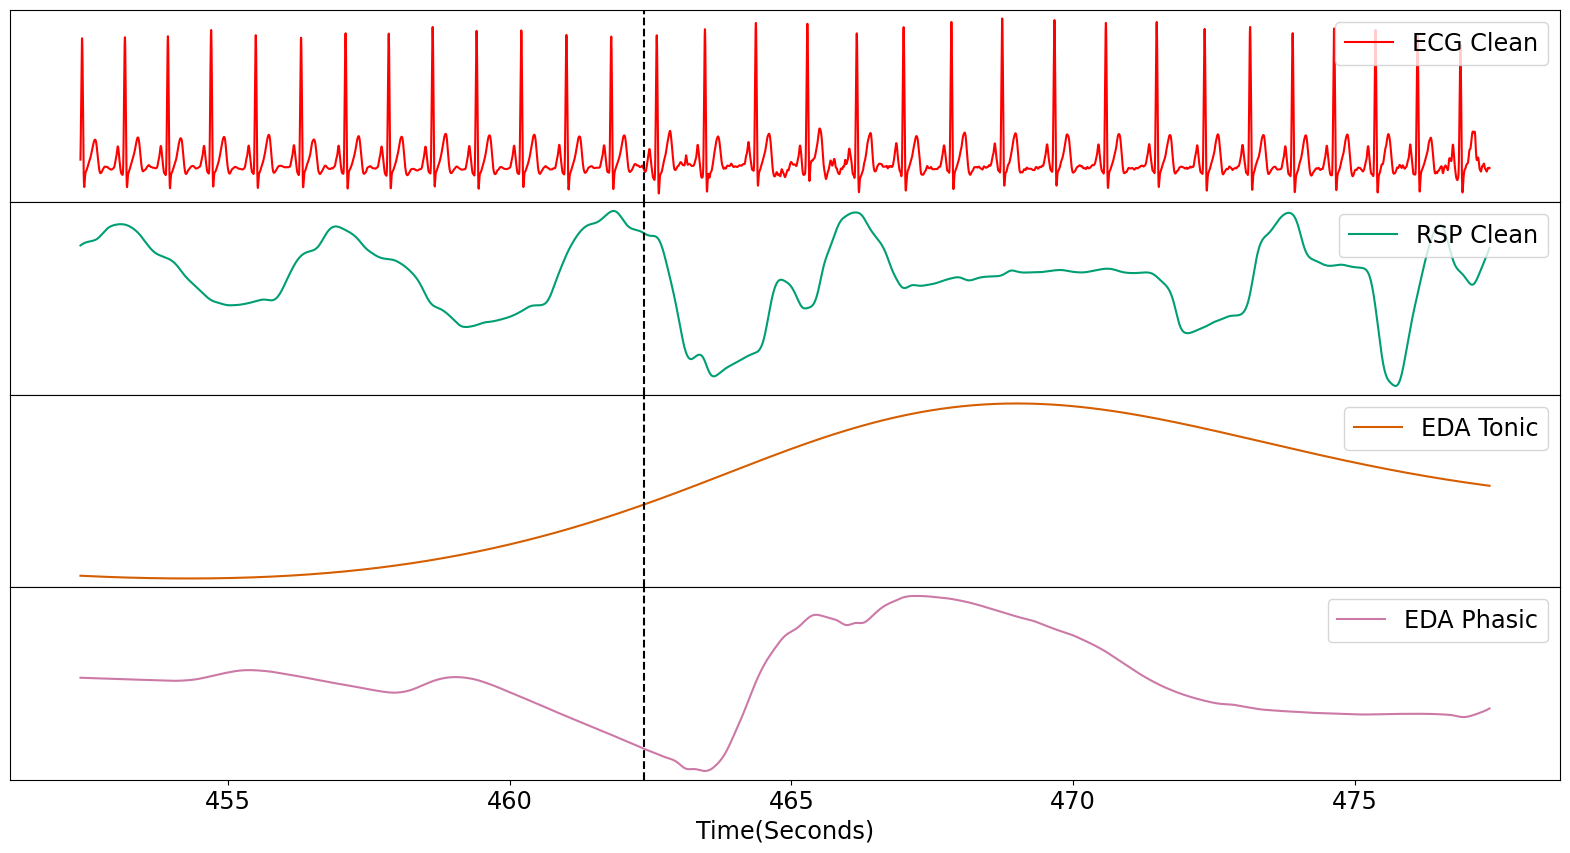

In [10]:
# Plotting the First 10 Seconds of the Cleaned Baseline Signals
fig, axs = plt.subplots(4, 1, figsize=(20, 10))
axs[0].plot(observations_around_obstacle.index.total_seconds(), observations_around_obstacle["ECG_Clean"], color="r", label="ECG Clean")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].legend(loc='upper right', fontsize='xx-large')

# axs[1].plot(observations_around_obstacle.index.total_seconds(), observations_around_obstacle["ECG_Rate"], color="#56B4E9", label="ECG Rate")
# axs[1].set_xticks([])
# axs[1].set_yticks([])
# axs[1].legend(loc='upper right', fontsize='xx-large')

axs[1].plot(observations_around_obstacle.index.total_seconds(), observations_around_obstacle['RSP_Clean'], color="#009E73", label='RSP Clean')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].tick_params(axis='x', labelsize='xx-large')

# axs[3].plot(observations_around_obstacle.index.total_seconds(), observations_around_obstacle['RSP_Rate'], color="#F0E442", label='RSP Rate')
# axs[3].set_xticks([])
# axs[3].set_yticks([])
# axs[3].tick_params(axis='x', labelsize='xx-large')

# axs[4].plot(observations_around_obstacle.index.total_seconds(), observations_around_obstacle['EDA_Clean'], color="#0072B2", label='EDA Clean')
# axs[4].set_xticks([])
# axs[4].set_yticks([])
# axs[4].tick_params(axis='x', labelsize='xx-large')

axs[2].plot(observations_around_obstacle.index.total_seconds(), observations_around_obstacle['EDA_Tonic'], color="#D55E00", label='EDA Tonic')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].tick_params(axis='x', labelsize='xx-large')

axs[3].plot(observations_around_obstacle.index.total_seconds(), observations_around_obstacle['EDA_Phasic'], color="#CC79A7", label='EDA Phasic')
axs[3].set_yticks([])
axs[3].tick_params(axis='x', labelsize='xx-large')
axs[3].set_xlabel('Time(Seconds)', fontsize='xx-large')
axs[3].legend(loc='upper right', fontsize='xx-large')

# # add a verticle line at the takeover request time
for ax in axs:
    ax.axvline(x=pd.to_timedelta(takeover_request_time.values[0]).total_seconds(), color="black", linestyle="--") #, label="TOR")
    ax.legend(loc='upper right', fontsize='xx-large')

    # ax.axvline(x=pd.to_timedelta(driver_response_time.values[0]).total_seconds(), color="black", linestyle="dashdot") #, label="Driver Response")
    # ax.legend(loc='upper right', fontsize='xx-large')

plt.subplots_adjust(hspace=0) 
plt.show()